In [2]:
import cv2
import json
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import glob

#### json file read 

In [2]:
# 경로 설정 
train_data_dir = "C:/Users/Playdata/Desktop/FinalProject/test/dataset/QC_IMAGE/Training"

test_data_dir = "C:/Users/Playdata/Desktop/FinalProject/test/dataset/QC_IMAGE/Validation"
categories = ['1++','1+','1','2','3']
nb_class=len(categories) # 5

In [3]:
# 이미지 사이즈 지정
image_w = 512
image_h = 512

pixels = image_w * image_h * 3

In [ ]:
x_train = []
y_train = []
x_train_nor = []
count_train = [0, 0, 0, 0, 0]

for idx, c in enumerate(categories):

    label = [0 for i in range(nb_class)]
    label[idx] = 1

    image_dir = train_data_dir+"/Image_"+c
    json_dir = train_data_dir+"/Label_"+c
    files = glob.glob(image_dir+"/*.jpg")
    json_files = glob.glob(json_dir+"/*.json")
    
    # 이미지 파일과 json 파일이 같은 순서로 나오는 것 확인하는 코드
    # for i in range(len(files)):
    #    print(json_files[i])
    #    print(files[i])
    
    for i, f in enumerate(files):
        count_train[idx] += 1
        img = Image.open(f)
        img.convert("RGB")
        img.resize((image_w,image_h))
        data = np.asarray(img)
        x_train.append(data)
        y_train.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train_norm =  x_train.astype('float32')/255

In [ ]:
train_data_dir = "C:/Users/Playdata/Desktop/FinalProject/test/dataset/QC_IMAGE/Training"
QC_cow_segmentation_1++_000031.jpg

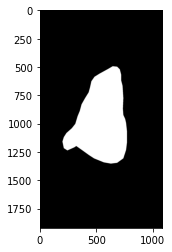

197 763 495 1352


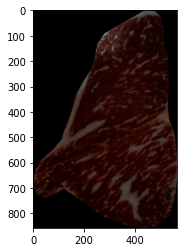

In [17]:
# 본인 이미지 경로에 맞춰 확인! 
img = cv2.imread("C:/Users/Playdata/Desktop/FinalProject/test/dataset/QC_IMAGE/Training/Image_1++/QC_cow_segmentation_1++_000031.jpg", -1)
with open("C:/Users/Playdata/Desktop/FinalProject/test/dataset/QC_IMAGE/Training/Label_1++/QC_cow_segmentation_1++_000031.json") as f:
    json_data = json.load(f)
    contour = json_data['label_info']['shapes'][0]['points']
    
    min_x = 30000
    min_y = 30000
    max_x = -1
    max_y = -1
    
    for i in range(len(contour)):
        contour[i][0] = int(contour[i][0])
        contour[i][1] = int(contour[i][1])
        if contour[i][0] > max_x:
            max_x = contour[i][0]
        if contour[i][0] < min_x:
            min_x = contour[i][0]
        if contour[i][1] > max_y:
            max_y = contour[i][1]
        if contour[i][1] < min_y:
            min_y = contour[i][1]
            
    img = img[:,:,::-1]
    mask = np.zeros_like(img)
    
    polygon = contour
    polygon = np.array(polygon)
    
    cv2.fillPoly(mask,[polygon],[255, 255, 255])
    plt.imshow(mask)
    plt.show()
    masked = cv2.bitwise_and(img, mask)
    
    print(min_x, max_x, min_y, max_y)
    masked_crop = masked[min_y : max_y+1, min_x :max_x+1]
    
    
plt.imshow(masked)
plt.imshow(masked_crop)


